In [1]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import numpy as np
import pandas as pd
import scipy

# Instansiate the Plotly charting library.
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

# We use plotly.offline as this allows us to create interactive 
# visualisations without the use of an internet connection, 
# making our notebook more distributable to others. 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# The Cufflinks library allows us to directly bind 
# Pandas dataframes to Plotly charts. 
import cufflinks as cf
# Once again we use the Cufflinks library in offline mode. 
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options. We use these to make our interactive 
# visualisations more aesthetically appealing. 
from IPython.core.display import HTML
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from ipywidgets import interact, interact_manual, widgets

PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name


In [3]:
df = pd.read_csv('data/freeman_well_4_eng.csv')

In [4]:
df.head()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,Facies_code
0,7682.5,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0
1,7683.0,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0
2,7683.5,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0
3,7684.0,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0
4,7684.5,39.0321,0.9332,137.507,2.2382,0.5983,0.0188,0.002024,7272.357044,0.0,0.0,0.0188,3183.84791,1.261715,314.443398,0


In [5]:
df.describe()

,Depth,GR,Log_ILD,DT,RHOB,NPHI,PHI,PERM,velocity,GRI,vshale,PHIeff,formation_factor,swirr,permeability,Facies_code
count,7265.000000,7265.000000,7265.000000,7265.000000,7265.000000,7265.000000,7265.000000,7.265000e+03,7265.000000,7265.000000,7265.000000,7265.000000,7265.000000,7265.000000,7265.000000,7265.000000
mean,9517.223331,108.293192,16.686765,117.874985,2.330328,0.423403,0.162792,1.977483e+02,8564.862129,0.562718,0.302175,0.122300,229.662175,0.175266,1083.666108,1.825877
std,1056.782447,22.199250,167.285802,11.622890,0.081174,0.065546,0.052950,1.311868e+04,828.281152,0.180360,0.159239,0.058002,4060.743664,0.290042,454.296977,0.556887
min,7682.500000,37.810800,0.081200,84.811200,1.863100,0.099500,0.002300,9.469370e-04,6307.620110,-0.009900,-0.002081,-0.056698,3.356001,0.040963,304.480215,0.000000
25%,8609.500000,102.002300,0.877700,108.411500,2.282900,0.385200,0.134300,4.130884e-01,7813.610998,0.511600,0.225251,0.082704,19.967648,0.099919,784.459545,2.000000
50%,9517.500000,112.544400,1.025200,114.953800,2.347500,0.422300,0.157500,1.202248e+00,8699.146962,0.597300,0.301023,0.113300,32.979076,0.128412,964.244350,2.000000
75%,10430.500000,120.183500,1.362400,127.981800,2.391600,0.461700,0.198900,8.089225e+00,9224.113678,0.659300,0.367208,0.167521,46.454551,0.152405,1356.066594,2.000000
max,11357.000000,178.320800,1950.000000,158.538400,2.564600,0.656900,0.455900,1.115233e+06,11790.895542,1.131700,1.429091,0.439745,291525.696795,12.073229,5824.492160,2.000000


In [6]:
df.isnull().sum()

Depth               0
GR                  0
Log_ILD             0
DT                  0
RHOB                0
NPHI                0
PHI                 0
PERM                0
velocity            0
GRI                 0
vshale              0
PHIeff              0
formation_factor    0
swirr               0
permeability        0
Facies_code         0
dtype: int64

In [7]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI',…

In [8]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    if x == y:
        print(f"Please select seperate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers', 
                 xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')
        ## if you are using Google Colab, comment out the above line of code and uncomment the lines below
        #fig = px.scatter(df, x=x, y=y, title=f'{y.title()} vs {x.title()}')
        #fig.show(renderer="colab")

interactive(children=(Dropdown(description='x', options=('Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI', 'PHI'…

In [9]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

# We use the Figure Factory module of Plotly, which
# defines many unique and powerful plots to be used
# in Python. 
# For more info, see: https://plot.ly/python/figure-factory-subplots/
import plotly.figure_factory as ff

corrs = df.corr()

@interact
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)
    ## if you are using Google Colab, comment out the above line of code and uncomment the line below
    #figure.show(renderer="colab")

interactive(children=(Dropdown(description='colorscale', options=('Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Blue…

In [10]:
@interact_manual
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    if x == y:
        print(f"Please select seperate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers', 
                 xTitle=x.title(), yTitle=y.title(), 
                 text='Depth',
                 title=f'{y.title()} vs {x.title()}',
                theme=theme, colorscale=colorscale)
        ## if you are using Google Colab, comment out the above line of code and uncomment the line below
        #fig = px.scatter(df, x=x, y=y, title=f'{y.title()} vs {x.title()}')
        #fig.show(renderer="colab")

interactive(children=(Dropdown(description='x', options=('Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI', 'PHI'…

In [11]:
from pore_pressure import eaton_method

In [12]:
from class2 import vp_to_vs
df['vs'] = vp_to_vs(df, 'velocity')

In [13]:
df['Pore_pressure'] = eaton_method(df['velocity'], df['vs'], df['PHI'])

Depth               0.757869
GR                  0.265630
Log_ILD            -0.057573
DT                 -0.955729
RHOB                0.638151
NPHI               -0.473344
PHI                -0.668967
PERM               -0.044290
velocity            0.960424
GRI                 0.265632
vshale              0.309332
PHIeff             -0.724500
formation_factor    0.020371
swirr               0.088293
permeability       -0.740918
Facies_code         0.006585
vs                  0.960424
Pore_pressure       1.000000
dtype: float64


<AxesSubplot:>

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Correlation with target')

Text(0.5, 1.0, 'Correlation between features and target variable')

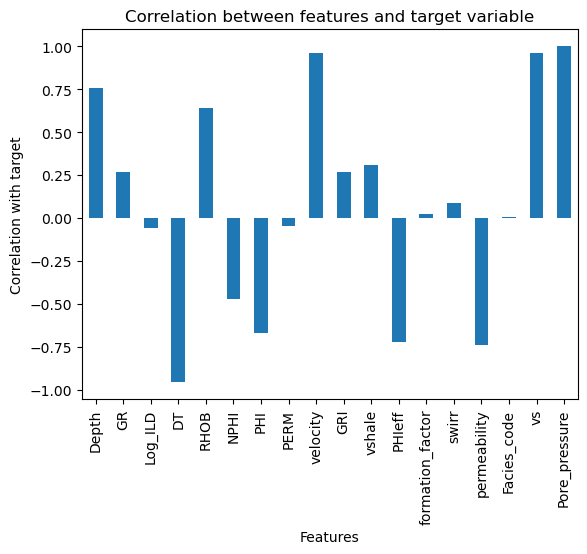

In [15]:
# Calculate the correlation coefficients between features and the target variable
import matplotlib.pyplot as plt
corr_with_target = df.corrwith(df['Pore_pressure'])

# Display the correlation coefficients
print(corr_with_target)

corr_with_target.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Features')
plt.ylabel('Correlation with target')
plt.title('Correlation between features and target variable')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import joblib

In [45]:
# Define input features and target variable
X = df[['Log_ILD', 'RHOB', 'GR', 'Facies_code', 'Depth', 'vs', 'PHI']]
y = df['Pore_pressure']

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define dictionary of models and their hyperparameters
models = {
    'svm': {
        'model': make_pipeline(StandardScaler(), SVR()),
        'params': {
            'svr__kernel': ['linear', 'rbf', 'poly'],
            'svr__C': [0.1, 1, 10],
            'svr__gamma': ['scale', 'auto']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [10, 20, 30]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'neural_network': {
        'model': MLPRegressor(),
        'params': {
            'hidden_layer_sizes': [(10,), (20,), (30,)],
            'activation': ['relu', 'tanh', 'logistic']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'learning_rate': [0.05, 0.1, 0.2],
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 7]
        }
    }
}

In [51]:
scores = []
# Loop over each model and perform grid search with cross-validation to find best hyperparameters 
## scoring='neg_mean_squared_error'
for model_name, model in models.items():
    clf = GridSearchCV(model['model'], model['params'], cv=5, n_jobs=-1, return_train_score=False)
    clf.fit(X_train, y_train)
    best_params = clf.best_params_
    
    # Evaluate best model on test set
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = clf.score(X_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': best_params,
        'RMSE': rmse,
        'R-squared': r2
    })
    # Save the best model for each method
    joblib.dump(clf.best_estimator_, f"models/{model_name}_best_model_pp.pkl")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.1, 1, 10],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf', 'poly']})

['models/svm_best_model_pp.pkl']

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 150]})

['models/random_forest_best_model_pp.pkl']

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10]})

['models/decision_tree_best_model_pp.pkl']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20,), (30,)]})

['models/neural_network_best_model_pp.pkl']

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

['models/gradient_boosting_best_model_pp.pkl']

In [53]:
best_model_df = pd.DataFrame(scores, columns=['model', 'best_params', 'best_score', 'RMSE', 'R-squared'])
best_model_df

,model,best_params,best_score,RMSE,R-squared
0,svm,"{'svr__C': 10, 'svr__gamma': 'scale', 'svr__ke...",0.423286,375672.506942,0.504918
1,random_forest,"{'max_depth': 30, 'n_estimators': 150}",0.998659,15175.882696,0.999192
2,decision_tree,"{'max_depth': 15, 'min_samples_split': 5}",0.996824,22144.384502,0.998280
3,neural_network,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.840123,208367.970033,0.847693
4,gradient_boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999087,15103.999692,0.999200


In [54]:
best_model_df.to_csv('data/best_model_pp.csv', index=False)

In [55]:
# Load the models from the model folder
model_rf = joblib.load('models/random_forest_best_model_pp.pkl')
model_dt = joblib.load('models/decision_tree_best_model_pp.pkl')
model_gb = joblib.load('models/gradient_boosting_best_model_pp.pkl')
model_nn = joblib.load('models/neural_network_best_model_pp.pkl')

In [56]:
# Predict y values for x_test
y_pred_rf = model_rf.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_nn = model_nn.predict(X_test)

X_test_df = pd.DataFrame(X_test, columns=['Log_ILD', 'RHOB', 'GR', 'Facies_code', 'Depth', 'vs', 'PHI'])

# Create a dataframe with x_test, y_test, and y_predict
results_df = pd.DataFrame({'Depth': X_test_df['Depth'],
                           'Log_ILD': X_test_df['Log_ILD'],
                           'NPHI': X_test_df['PHI'],
                           'RHOB': X_test_df['RHOB'],
                           'vshale': X_test_df['GR'],
                           'Facies': X_test_df['Facies_code'],
                           'velocity': X_test_df['vs'],
                           'Actual pore pressure': y_test,
                           'rf_pore pressure': y_pred_rf,
                           'dt_pore pressure': y_pred_dt,
                           'gb_pore pressure': y_pred_gb,
                           'nn_pore pressure': y_pred_nn
                          })

# Print the dataframe
results_df.to_csv('results_test_pp.csv', index=False)
results_df.head()

,Depth,Log_ILD,NPHI,RHOB,vshale,Facies,velocity,Actual pore pressure,rf_pore pressure,dt_pore pressure,gb_pore pressure,nn_pore pressure
973,8172.0,0.9282,0.2299,2.2552,102.5593,2,5211.8153,3.674948e+06,3.677256e+06,3.672735e+06,3.678472e+06,3.882558e+06
4851,10132.0,1.0926,0.1748,2.3378,103.3956,2,6194.3450,4.565100e+06,4.563088e+06,4.564944e+06,4.568714e+06,4.688572e+06
5286,10349.5,0.8233,0.1595,2.3607,109.3129,2,5987.9039,4.464277e+06,4.464754e+06,4.464090e+06,4.464955e+06,4.636203e+06
5228,10320.5,0.8070,0.1515,2.3727,117.8880,2,6016.4298,4.512229e+06,4.513132e+06,4.552514e+06,4.521465e+06,4.645185e+06
5834,10623.5,1.2484,0.1267,2.4100,119.9572,2,6631.5549,5.063434e+06,5.063906e+06,5.062338e+06,5.069838e+06,4.979762e+06


In [58]:
# Predict y values for x_train
y_pred_rf_train = model_rf.predict(X_train)
y_pred_dt_train = model_dt.predict(X_train)
y_pred_gb_train = model_gb.predict(X_train)
y_pred_nn_train = model_nn.predict(X_train)

X_train_df = pd.DataFrame(X_train, columns=['Log_ILD', 'RHOB', 'GR', 'Facies_code', 'Depth', 'vs', 'PHI'])

# Create a dataframe with x_test, y_test, and y_predict
train_df = pd.DataFrame({'Depth': X_train_df['Depth'],
                           'Log_ILD': X_train_df['Log_ILD'],
                           'NPHI': X_train_df['PHI'],
                           'RHOB': X_train_df['RHOB'],
                           'vshale': X_train_df['GR'],
                           'Facies': X_train_df['Facies_code'],
                           'velocity': X_train_df['vs'],
                           'Actual Permeability': y_train,
                           'rf_Permeability': y_pred_rf_train,
                           'dt_Permeability': y_pred_dt_train,
                           'gb_Permeability': y_pred_gb_train,
                           'nn_pore pressure': y_pred_nn_train
                        })

# Print the dataframe
train_df.to_csv('results_pp.csv', index=False)
train_df.head()

,Depth,Log_ILD,NPHI,RHOB,vshale,Facies,velocity,Actual Permeability,rf_Permeability,dt_Permeability,gb_Permeability,nn_pore pressure
5203,10308.0,0.8714,0.1640,2.3540,117.4186,2,6102.9770,4.534760e+06,4.533346e+06,4.532629e+06,4.529490e+06,4.681970e+06
6108,10764.0,1.3611,0.1247,2.4130,107.9883,2,6762.4434,5.170676e+06,5.170506e+06,5.170580e+06,5.168760e+06,5.062915e+06
6650,11035.0,0.9329,0.1207,2.4189,123.6542,2,6397.1996,4.905188e+06,4.903596e+06,4.903929e+06,4.898745e+06,4.950147e+06
1500,8445.5,1.5825,0.0379,2.2160,60.4310,0,6070.8420,4.915813e+06,4.915641e+06,4.915713e+06,4.914518e+06,4.314421e+06
1578,8487.5,1.4668,0.2075,2.2888,91.5867,2,6000.6431,4.310038e+06,4.313504e+06,4.310038e+06,4.287719e+06,4.295889e+06
